In [1]:
"""Notebok loads raw roughness experimental data, explores it and prepares the dataset ready for training.
Source: https://www.kaggle.com/datasets/adorigueto/cnc-turning-roughness-forces-and-tool-wear
"""

'Notebok loads raw roughness experimental data, explores it and prepares the dataset ready for training.\nSource: https://www.kaggle.com/datasets/adorigueto/cnc-turning-roughness-forces-and-tool-wear\n'

In [2]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from typing import Type, List

In [3]:
def plot_heatmap(x: np.ndarray, labels: List[str], title: str) -> None:
    """Plots a symmetrical 2D heatmap of the input data.
    
    Args:
        x: Input data, has to be a symmetrical 2D array.
        labels: Labels of the data.
        title: Title of the heatmap.
    """
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='hot')

    # Set the tick labels.
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')

    # Create data annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, x[i, j],
                           ha='center', va='center', color='g', fontsize = 8)
            
    ax.set_title(f'{title} - Heatmnap')

    plt.show()

# Load & visualize the data

In [4]:
exp1_path = pathlib.Path('./data/roughness_dataset/Exp1.csv')
exp2_path = pathlib.Path('./data/roughness_dataset/Exp2.csv')

In [5]:
df_exp1_raw = pd.read_csv(exp1_path, verbose=True)
df_exp2_raw = pd.read_csv(exp2_path, verbose=True)

Tokenization took: 0.14 ms
Type conversion took: 0.51 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 0.11 ms
Type conversion took: 0.31 ms
Parser memory cleanup took: 0.00 ms


In [6]:
df_exp1_raw.head()

,Run_ID,Experiment,Replica,Tool_ID,Group,Subgroup,Position,Condition,TCond,Machined_length,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.391,1.855,0.560,2.423,71.4,2.082,49.23,44.46,21.07,69.600499
1,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.359,1.670,0.530,2.229,70.9,1.918,49.23,44.46,21.07,69.600499
2,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.421,1.912,0.634,2.332,71.2,2.062,49.23,44.46,21.07,69.600499
3,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.450,1.961,0.676,2.325,72.8,2.063,49.23,44.46,21.07,69.600499
4,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.360,1.782,0.714,2.636,69.4,1.957,49.23,44.46,21.07,69.600499


In [7]:
df_exp2_raw.head()

,Run_ID,Experiment,Replica,Tool_ID,Group,Subgroup,Position,Condition,TCond,Machined_length,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.050,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267
1,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.088,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267
2,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.056,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267
3,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.059,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267
4,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.062,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267


In [8]:
print(len(df_exp1_raw))
print(len(df_exp2_raw))

324
288


In [9]:
df_exp1_raw.describe()

,Experiment,Replica,Tool_ID,Group,Subgroup,Condition,TCond,Machined_length,Init_diameter,Final_diameter,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
count,324.0,324.000000,324.000000,324.00000,324.000000,324.000000,324.0,324.0,324.000000,324.000000,...,324.00000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,1.0,1.500000,46.000000,2.00000,5.000000,14.000000,0.0,12.0,91.783333,90.750000,...,0.71559,3.039528,0.387111,2.190367,98.795988,3.222167,145.106481,66.938519,92.396481,187.948347
std,0.0,0.500773,17.104668,0.81776,2.585983,7.800929,0.0,0.0,1.673329,1.886837,...,0.32968,1.256842,0.334777,0.384161,24.878383,1.268561,72.080271,16.412371,72.710940,97.453191
min,1.0,1.000000,21.000000,1.00000,1.000000,1.000000,0.0,12.0,89.400000,87.800000,...,0.21100,1.073000,-0.483000,1.494000,47.500000,1.214000,49.230000,41.600000,18.870000,69.337876
25%,1.0,1.000000,31.000000,1.00000,3.000000,7.000000,0.0,12.0,90.400000,89.400000,...,0.45175,1.991250,0.138250,1.900250,71.200000,2.234250,80.140000,56.550000,25.760000,103.297697
50%,1.0,1.500000,46.000000,2.00000,5.000000,14.000000,0.0,12.0,91.700000,90.650000,...,0.64300,2.703000,0.418000,2.127000,100.600000,2.899000,142.700000,61.730000,68.600000,173.205988
75%,1.0,2.000000,61.000000,3.00000,7.000000,21.000000,0.0,12.0,93.500000,92.500000,...,0.92900,3.986750,0.637000,2.390000,128.800000,4.208500,177.500000,78.350000,125.200000,221.922261
max,1.0,2.000000,71.000000,3.00000,9.000000,27.000000,0.0,12.0,94.000000,93.500000,...,1.81200,6.548000,1.095000,3.403000,138.100000,6.699000,289.600000,100.700000,227.500000,377.572513


In [10]:
df_exp2_raw.describe()

,Experiment,Replica,Tool_ID,Group,Condition,TCond,Machined_length,Init_diameter,Final_diameter,R_measurement,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
count,288.0,288.00000,288.000000,288.000000,288.000000,288.000000,288.0,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2.0,1.50000,41.000000,3.500000,12.500000,0.133333,12.0,84.766667,84.016667,3.500000,...,0.645656,2.905635,0.515278,2.390323,90.553819,3.172941,127.557708,122.585833,83.590833,199.447857
std,0.0,0.50087,22.098922,1.710798,6.934236,0.124939,0.0,2.490400,2.585136,1.710798,...,0.268928,1.079279,0.335093,0.574227,27.981662,1.162244,47.135946,64.078528,51.496278,86.491341
min,2.0,1.00000,13.000000,1.000000,1.000000,0.000000,12.0,76.600000,75.600000,1.000000,...,0.142000,0.706000,-0.285000,1.443000,31.400000,0.840000,51.500000,44.640000,24.170000,73.725041
25%,2.0,1.00000,23.000000,2.000000,6.750000,0.000000,12.0,84.100000,83.600000,2.000000,...,0.463750,2.167250,0.269750,1.967250,69.775000,2.380500,91.965000,71.072500,45.552500,130.877863
50%,2.0,1.50000,38.000000,3.500000,12.500000,0.100000,12.0,85.350000,84.600000,3.500000,...,0.613000,2.762500,0.511500,2.316000,89.900000,3.021000,117.700000,102.850000,75.875000,184.038155
75%,2.0,2.00000,53.000000,5.000000,18.250000,0.300000,12.0,86.600000,85.600000,5.000000,...,0.798250,3.649000,0.774500,2.649750,110.825000,3.861750,163.650000,188.150000,90.517500,238.617790
max,2.0,2.00000,81.000000,6.000000,24.000000,0.300000,12.0,87.100000,86.600000,6.000000,...,1.675000,6.855000,1.301000,4.212000,134.400000,8.003000,230.000000,243.700000,206.600000,384.259678


In [11]:
# Isolate relevant features (roughnesses) & output variable (F).
df_exp1 = df_exp1_raw[["Ra", "Rz", "Rsk", "Rku", "RSm", "Rt", "F"]]
df_exp2 = df_exp2_raw[["Ra", "Rz", "Rsk", "Rku", "RSm", "Rt", "F"]]

In [12]:
# Merge the 2 experiments into a single dataset.
df = pd.concat([df_exp1, df_exp2])

In [13]:
df

,Ra,Rz,Rsk,Rku,RSm,Rt,F
0,0.391,1.855,0.560,2.423,71.4,2.082,69.600499
1,0.359,1.670,0.530,2.229,70.9,1.918,69.600499
2,0.421,1.912,0.634,2.332,71.2,2.062,69.600499
3,0.450,1.961,0.676,2.325,72.8,2.063,69.600499
4,0.360,1.782,0.714,2.636,69.4,1.957,69.600499
...,...,...,...,...,...,...,...
283,0.488,2.934,0.925,3.603,73.0,3.168,342.904447
284,0.481,2.872,1.013,3.741,90.8,2.993,342.904447
285,0.467,2.852,1.060,3.951,77.7,3.156,342.904447
286,0.481,2.787,0.870,3.386,81.3,3.037,342.904447


In [14]:
# Remove duplicate F entires.
df = df[~df.duplicated(subset=['F'])]

In [15]:
df.describe()

,Ra,Rz,Rsk,Rku,RSm,Rt,F
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.682294,2.971539,0.437755,2.267206,95.382353,3.210549,193.359881
std,0.297301,1.154035,0.326077,0.451078,26.908861,1.212114,92.941565
min,0.143000,0.778000,-0.433000,1.443000,31.400000,0.931000,69.337876
25%,0.462500,2.137500,0.174250,1.948250,70.700000,2.413750,106.415024
50%,0.636000,2.737500,0.465500,2.239500,98.900000,2.963000,174.913028
75%,0.863250,3.768250,0.645750,2.476000,125.400000,4.078750,237.158861
max,1.812000,6.855000,1.228000,3.597000,138.100000,8.003000,384.259678


In [16]:
df.head()

,Ra,Rz,Rsk,Rku,RSm,Rt,F
0,0.391,1.855,0.560,2.423,71.4,2.082,69.600499
6,1.181,4.853,0.793,2.390,132.5,5.186,103.656011
12,0.612,2.451,0.767,2.320,100.9,2.626,85.184803
18,0.709,2.629,0.612,1.947,100.0,2.783,86.211455
24,1.111,4.285,0.470,2.028,131.7,4.416,105.607375


In [17]:
len(df)

102

Text(0.5, 1.0, 'Rt')

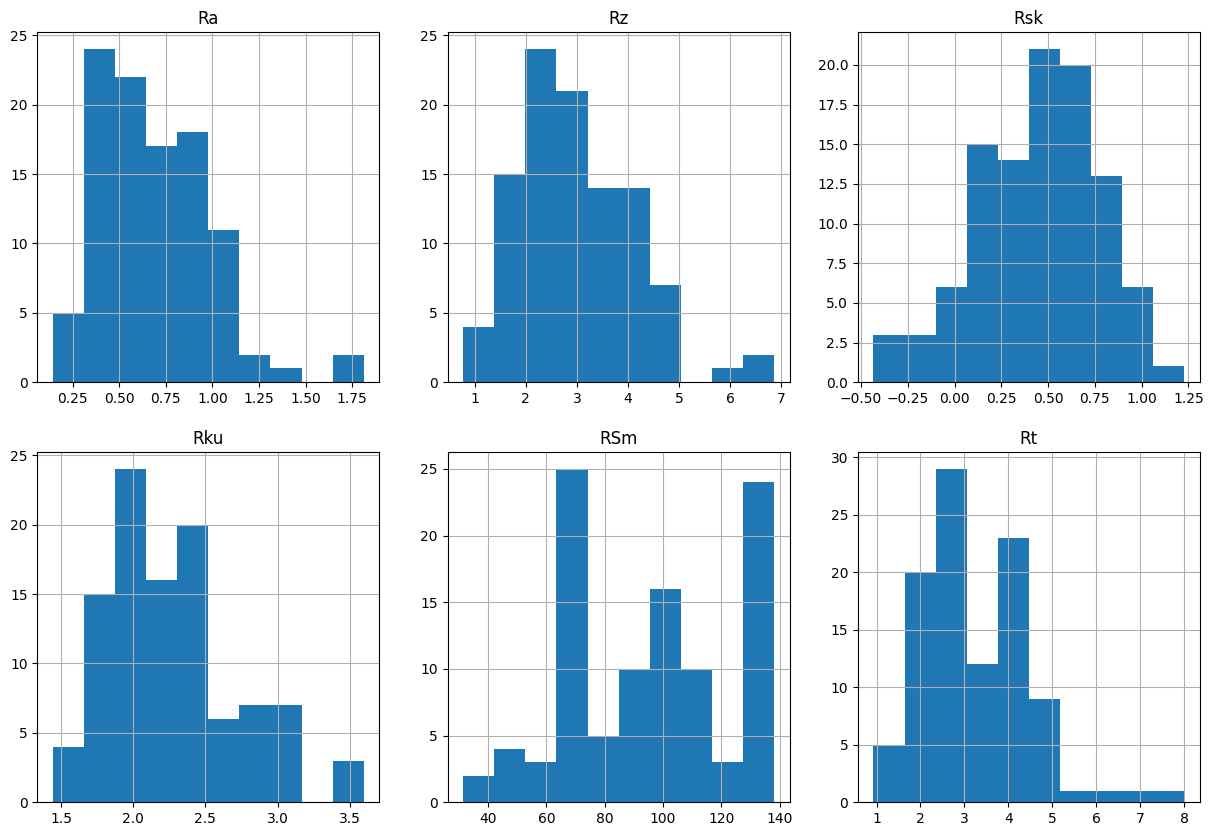

In [18]:
# Display feature distributions.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

df["Ra"].hist(ax=axs[0,0])
axs[0,0].set_title('Ra')

df["Rz"].hist(ax=axs[0,1])
axs[0,1].set_title('Rz')

df["Rsk"].hist(ax=axs[0,2])
axs[0,2].set_title('Rsk')

df["Rku"].hist(ax=axs[1,0])
axs[1,0].set_title('Rku')

df["RSm"].hist(ax=axs[1,1])
axs[1,1].set_title('RSm')

df["Rt"].hist(ax=axs[1,2])
axs[1,2].set_title('Rt')

<Axes: ylabel='Frequency'>

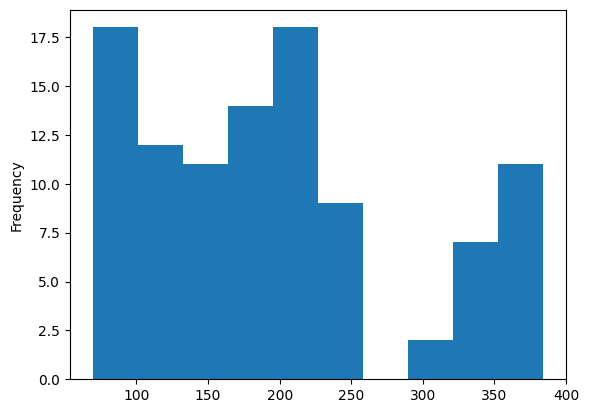

In [19]:
df["F"].plot(kind="hist")

# Clean, transform, normalize, visualize and export

In [20]:
# Begin the post-processing.
df_transformed = df.copy()

In [21]:
# Clean the outliers using IQR method.
# Outliers are defined as those outside of range defined by (1.5 x IQR + Q3) and (1.5 x IQR - Q1).
def clean_iqr_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1

    df = df.loc[lambda df: ~((df[column] < (q1 - 1.5*iqr)) | (df[column] > (q3 + 1.5*iqr)))]
    
    return df

In [22]:
for column in df_transformed.columns:
    df_transformed = clean_iqr_outliers(df_transformed, column)

In [23]:
# Apply logarthimc transformation to achieve more Gaussian distribution of variables.
df_transformed["Rku"] = np.log(df_transformed["Rku"]).astype(float)
df_transformed["Rt"] = np.log(df_transformed["Rt"]).astype(float)
df_transformed["Rz"] = np.log(df_transformed["Rz"]).astype(float)

Text(0.5, 1.0, 'Rt')

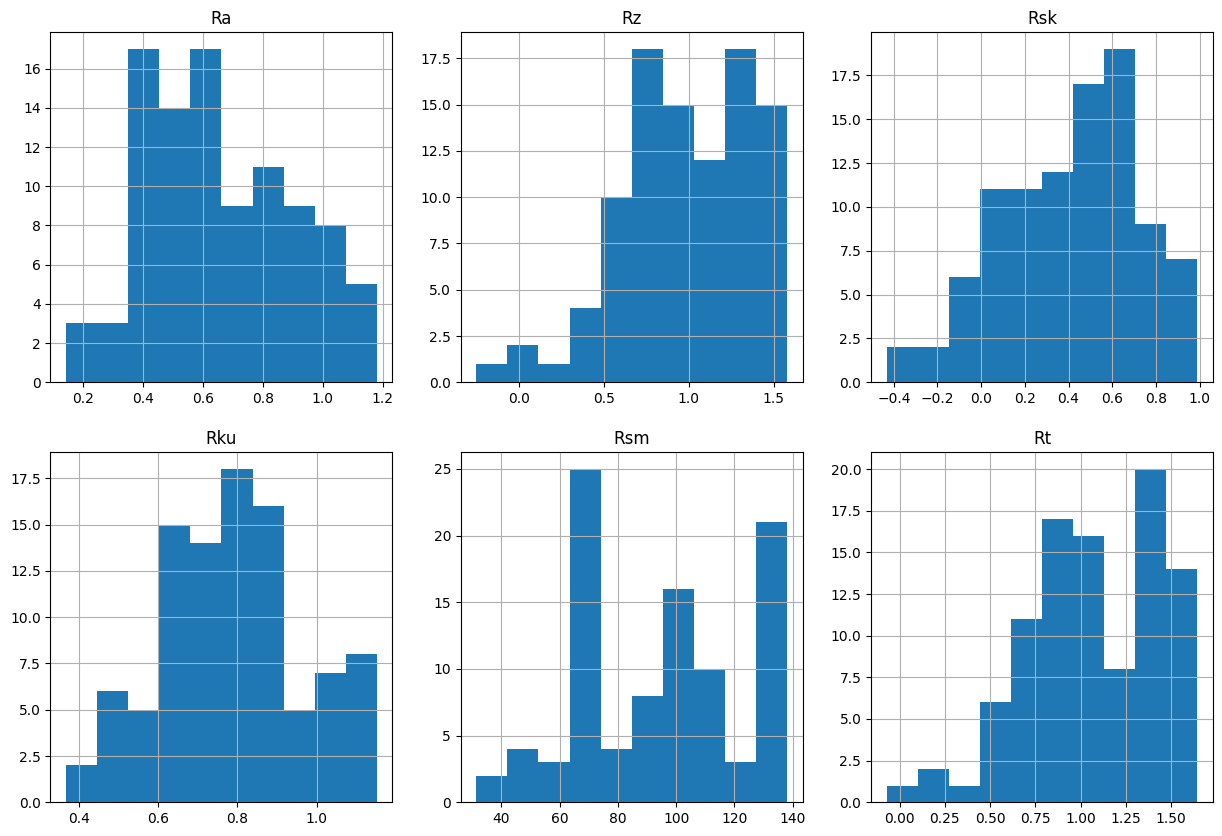

In [24]:
# Display feature distributions.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

df_transformed["Ra"].hist(ax=axs[0,0])
axs[0,0].set_title('Ra')

df_transformed["Rz"].hist(ax=axs[0,1])
axs[0,1].set_title('Rz')

df_transformed["Rsk"].hist(ax=axs[0,2])
axs[0,2].set_title('Rsk')

df_transformed["Rku"].hist(ax=axs[1,0])
axs[1,0].set_title('Rku')

df_transformed["RSm"].hist(ax=axs[1,1])
axs[1,1].set_title('Rsm')

df_transformed["Rt"].hist(ax=axs[1,2])
axs[1,2].set_title('Rt')

<Axes: ylabel='Frequency'>

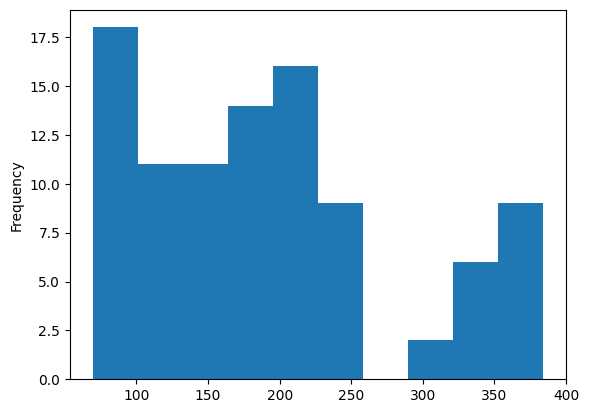

In [25]:
df_transformed["F"].plot(kind="hist")

In [26]:
# Extrapolate relevant min and max values for reverse transformations during evaluation.
print("Minimal F: ", df_transformed["F"].min())
print("Maximal F: ", df_transformed["F"].max())

Minimal F:  69.33787637
Maximal F:  384.2596778


In [27]:
def normalize_min_max(df, var_name):
    df[var_name]=(df[var_name]-df[var_name].min())/(df[var_name].max()-df[var_name].min())
    return df

In [28]:
# Normalize the variables that are not in the 0-1 range.
for var in df_transformed.columns:
    df_transformed = normalize_min_max(df_transformed, var)

In [29]:
df_transformed.describe()

,Ra,Rz,Rsk,Rku,RSm,Rt,F
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.496869,0.675994,0.595756,0.534413,0.591710,0.664567,0.379545
std,0.239491,0.208687,0.222453,0.225751,0.252721,0.212480,0.288370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304432,0.549448,0.408468,0.381894,0.367151,0.526139,0.115651
50%,0.474952,0.682621,0.619466,0.546147,0.632615,0.662164,0.329822
75%,0.683767,0.854027,0.756149,0.661840,0.792409,0.855968,0.524783
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Rt')

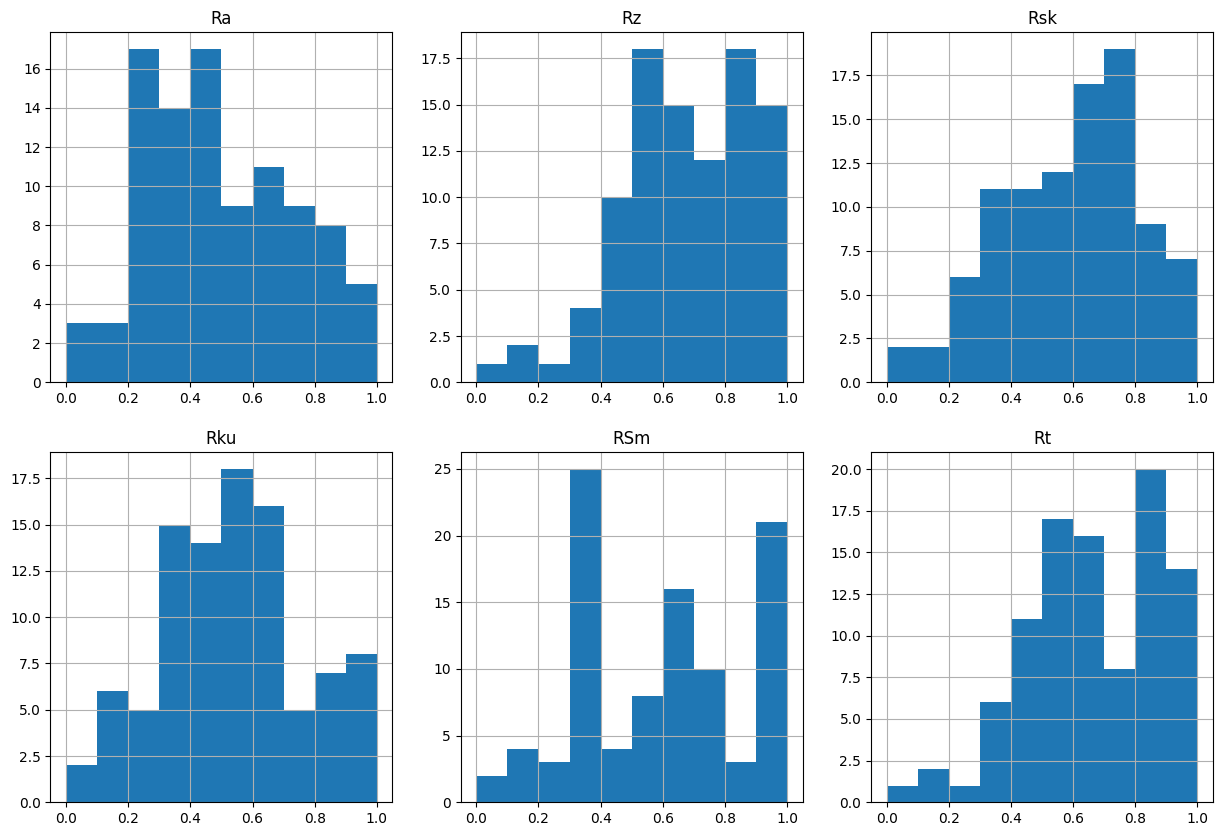

In [30]:
# Display feature distributions.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

df_transformed["Ra"].hist(ax=axs[0,0])
axs[0,0].set_title('Ra')

df_transformed["Rz"].hist(ax=axs[0,1])
axs[0,1].set_title('Rz')

df_transformed["Rsk"].hist(ax=axs[0,2])
axs[0,2].set_title('Rsk')

df_transformed["Rku"].hist(ax=axs[1,0])
axs[1,0].set_title('Rku')

df_transformed["RSm"].hist(ax=axs[1,1])
axs[1,1].set_title('RSm')

df_transformed["Rt"].hist(ax=axs[1,2])
axs[1,2].set_title('Rt')

<Axes: ylabel='Frequency'>

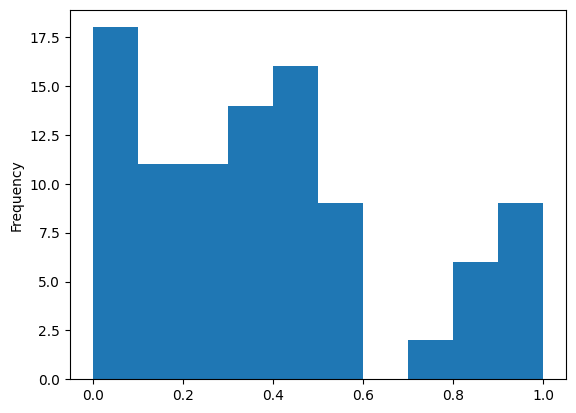

In [31]:
df_transformed["F"].plot(kind="hist")

In [32]:
# Compute and visualize covarience and correlation matrices.
features = ["Ra", "Rz", "Rsk", "Rku", "RSm", "Rt"]
labels = ["F"]

In [33]:
# Convert dataset into numpy arrays.
X = df_transformed[features].to_numpy()
y = df_transformed[labels].to_numpy()

In [34]:
X_y = np.concatenate((X, y), axis = 1)

In [35]:
X_y_labels = features + labels

In [36]:
# Compute the covariance matrix.
cov_matrix = np.cov(X_y.T, bias = True)
cov_matrix = np.around(cov_matrix, 2)

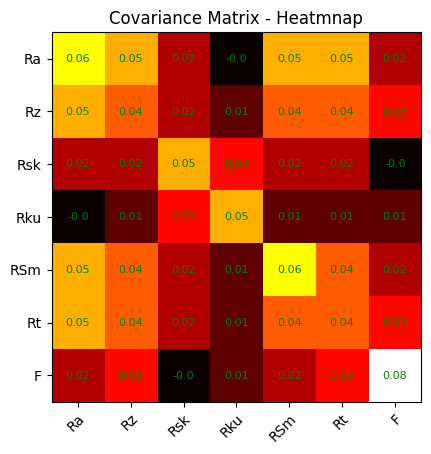

In [37]:
plot_heatmap(cov_matrix, X_y_labels, 'Covariance Matrix')

In [38]:
# Compute the correlation matrix.
corr_matrix = np.corrcoef(X_y.T)
corr_matrix = np.around(corr_matrix, 2)

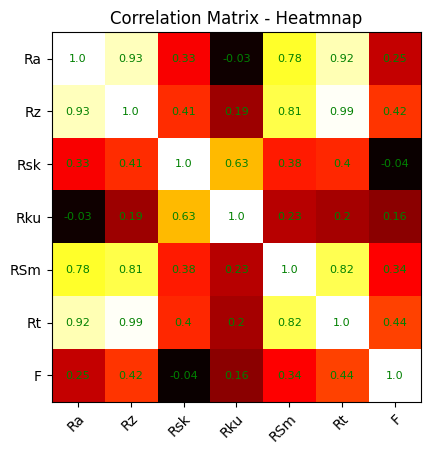

In [39]:
plot_heatmap(corr_matrix, X_y_labels, 'Correlation Matrix')

In [40]:
# Drop the less descriptive features.
df_transformed = df_transformed.drop(columns=["Rsk", "Rku"])

In [41]:
# Split the cleaned and transformed data into training and testing sets with a 90/10 ratio.
train_df, test_df = train_test_split(df_transformed, test_size=0.1, random_state=42)

In [42]:
# Export the data sets.
train_df.to_csv('./data/dataset_roughness_train.csv', index=False)
test_df.to_csv('./data/dataset_roughness_test.csv', index=False)